Tugas Besar IF2220 Probabilitas dan Statistika 
<br>Penarikan Kesimpulan dan Pengujian Hipotesis 

13522006 - Agil Fadillah Sabri
<br>13522034 - Bastian H Suryapratama

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as special

from collections import defaultdict
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import gamma
from scipy.stats import weibull_min
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ttest_ind

DATA = pd.read_csv("phone.csv")

### Fungsi-Fungsi

In [2]:
# variabel global
banyak_data = len(DATA)                           # jumlah data
template = "{:<20} | {:<30} | {:<30}"   # template untuk print

# Rumus untuk menghitung data numerik
# Mean
def myMean(data, atribut):
    # mean = Σx / n
    n = len(data[atribut])
    jumlah = 0
    for i in range(n):
        jumlah += data[atribut][i]
    return jumlah/n

# Median
def myMedian(data, atribut):
    n = len(data[atribut])
    sorted_data = sorted(data[atribut])
    mid = n // 2
    
    if n % 2 == 0:
        median = (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        median = sorted_data[mid]
    
    return median

# Modus
def myModus(data, atribut, tolerance=1e-5):
    # modus dengan toleransi 0.00001
    frequency = defaultdict(int)
    
    for num in data[atribut]:
        found = False
        for key in frequency.keys():
            if abs(num - key) < tolerance:
                frequency[key] += 1
                found = True
                break
        if not found:
            frequency[num] += 1
    
    max_count = max(frequency.values())
    modes = [k for k, v in frequency.items() if v == max_count]
    
    return modes[0]

# Maximum, Minimum, Range
def myMax(data, atribut):
    n = len(data[atribut])
    max = data[atribut][0]
    for i in range(1, n):
        if data[atribut][i] > max:
            max = data[atribut][i]
    return max

def myMin(data, atribut):
    n = len(data[atribut])
    min = data[atribut][0]
    for i in range(1, n):
        if data[atribut][i] < min:
            min = data[atribut][i]
    return min

def myRange(data, atribut):
    # range = max - min
    return myMax(data, atribut) - myMin(data, atribut)

# Variance dan Standard Deviation
def myVariance(data, atribut):
    n = len(data[atribut])
    # variance = Σ(x - mean)^2 / (n - 1)
    mean = myMean(data, atribut)
    jumlah = 0
    for i in range(n):
        jumlah += (data[atribut][i] - mean) ** 2
    return jumlah / (n - 1)

def myStdDev(data, atribut):
    # stdDev = sqrt(variance)
    return myVariance(data, atribut) ** 0.5

# Quartile dan Interquartile Range
def percentile(data, p):
    n = len(data)
    k = (n - 1) * p / 100
    f = int(k)      # indeks bawah terdekat dari k
    c = k - f       # nilai desimal dari k
    if f + 1 < len(data):   # menghindari index out of range
        return data[f] * (1 - c) + data[f + 1] * c
    else:
        return data[f]

def myQ1(data, atribut):
    data_sorted = sorted(data[atribut])
    return percentile(data_sorted, 25)

def myQ3(data, atribut):
    data_sorted = sorted(data[atribut])
    return percentile(data_sorted, 75)
    
def myIQR(data, atribut):
    return myQ3(data, atribut) - myQ1(data, atribut)

# Skewness
# https://www.slideshare.net/slideshow/3-skewness-kurtosispptx/255323562
def mySkewness(data, atribut):
    n = len(data[atribut])
    # koefisien_skewness = Σ((x - mean) / stdDev)^3
    # pengali = n / ((n - 1) * (n - 2))
    # skewness = pengali * koefisien_skewness
    mean = myMean(data, atribut)
    stdDev = myStdDev(data, atribut)
    koefisien_skewness = 0
    pengali = n / ((n - 1) * (n - 2))
    for i in range(n):
        koefisien_skewness += (((data[atribut][i] - mean) / stdDev) ** 3)
    return koefisien_skewness * pengali

# Kurtosis
def myKurtosis(data, atribut):
    n = len(data[atribut])
    # koefisien_kurtosis = Σ((x - mean) / stdDev)^4
    # pengali = n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))
    # pengurang = 3 * (n - 1)² / ((n - 2) * (n - 3))
    mean = myMean(data, atribut)
    stdDev = myStdDev(data, atribut)
    koefisien_kurtosis = 0
    pengali = n*(n + 1) / ((n - 1) * (n - 2) * (n - 3))
    pengurang = 3 * (n - 1) ** 2 / ((n - 2) * (n - 3))
    for i in range(n):
        koefisien_kurtosis += (((data[atribut][i] - mean) / stdDev) ** 4)
    return pengali * koefisien_kurtosis - pengurang

# Print Deskripsi Data
def printDescriptiveStatistics(data, atribut):
    print("Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library")
    print(template.format("Mean", myMean(data, atribut), data[atribut].mean()))
    print(template.format("Median", myMedian(data, atribut), data[atribut].median()))
    print(template.format("Modus", myModus(data, atribut), data[atribut].mode()[0]))
    print(template.format("Standar Deviasi", myStdDev(data, atribut), data[atribut].std()))
    print(template.format("Variansi", myVariance(data, atribut), data[atribut].var()))
    print(template.format("Range", myRange(data, atribut), data[atribut].max() - data[atribut].min()))
    print(template.format("Minimum", myMin(data, atribut), data[atribut].min()))
    print(template.format("Maksimum", myMax(data, atribut), data[atribut].max()))
    print(template.format("Q1", myQ1(data, atribut), data[atribut].quantile(0.25)))
    print(template.format("Q3", myQ3(data, atribut), data[atribut].quantile(0.75)))
    print(template.format("IQR", myIQR(data, atribut), data[atribut].quantile(0.75) - data[atribut].quantile(0.25)))
    print(template.format("Skewness", mySkewness(data, atribut), data[atribut].skew()))
    print(template.format("Kurtosis", myKurtosis(data, atribut), data[atribut].kurt()))

# No. 1 
# Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. 
1. Data yang bersifat numerik dapat diberikan nilai:
    - mean
    - median
    - modus 
    - standar deviasi
    - variansi
    - range
    - nilai minimum
    - nilai maksimum
    - kuartil
    - IQR
    - skewness
    - kurtosis.

2. Data dalam bentuk string dapat dicari:
    - unique values dan proporsi nya.

## 1.1 Data Numerik

1. Atribut "battery_power"

In [3]:
print("================================================")
print("|| Deskriptif Statistik atribut battery_power ||")
print("================================================")
printDescriptiveStatistics(DATA, "battery_power")

|| Deskriptif Statistik atribut battery_power ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 1920.8772990476155             | 1920.877299047615             
Median               | 1922.3991535760729             | 1922.3991535760729            
Modus                | 1908.9840881818127             | 1420.9542711910349            
Standar Deviasi      | 136.27872001794873             | 136.27872001794896            
Variansi             | 18571.889529730463             | 18571.88952973052             
Range                | 981.0035468694759              | 981.0035468694759             
Minimum              | 1420.9542711910349             | 1420.9542711910349            
Maksimum             | 2401.957818060511              | 2401.957818060511             
Q1                   | 1834.0146857852878             | 1834.0146857852878            
Q3                   | 2011.2957129993915             | 2011.2957129993915            
IQR       

2. Atribut "clock_speed"

In [4]:
print("==============================================")
print("|| Deskriptif Statistik atribut clock_speed ||")
print("==============================================")
printDescriptiveStatistics(DATA, "clock_speed")

|| Deskriptif Statistik atribut clock_speed ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 1.1026408758417092             | 1.1026408758417114            
Median               | 1.1001990467038927             | 1.1001990467038927            
Modus                | 1.2364119005429723             | 0.063078405199159             
Standar Deviasi      | 0.300748425357641              | 0.300748425357641             
Variansi             | 0.09044961535510056            | 0.09044961535510057           
Range                | 2.0825614916762274             | 2.0825614916762274            
Minimum              | 0.063078405199159              | 0.063078405199159             
Maksimum             | 2.1456398968753865             | 2.1456398968753865            
Q1                   | 0.902937801032792              | 0.902937801032792             
Q3                   | 1.3081738056485592             | 1.3081738056485592            
IQR         

3. Atribut "ram"

In [5]:
print("======================================")
print("|| Deskriptif Statistik atribut ram ||")
print("======================================")
printDescriptiveStatistics(DATA, "ram")

|| Deskriptif Statistik atribut ram ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 6.051994470940331              | 6.051994470940324             
Median               | 6.016747940727095              | 6.016747940727095             
Modus                | 5.911000501158811              | -2.140214030869556            
Standar Deviasi      | 2.010295820270809              | 2.0102958202708097            
Variansi             | 4.041289284998285              | 4.041289284998288             
Range                | 14.287584053417                | 14.287584053417               
Minimum              | -2.140214030869556             | -2.140214030869556            
Maksimum             | 12.147370022547443             | 12.147370022547443            
Q1                   | 4.689993678034316              | 4.689993678034316             
Q3                   | 7.413722745449254              | 7.413722745449254             
IQR                 

4. Atribut "n_cores"

In [6]:
print("==========================================")
print("|| Deskriptif Statistik atribut n_cores ||")
print("==========================================")
printDescriptiveStatistics(DATA, "n_cores")

|| Deskriptif Statistik atribut n_cores ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 12.044035453572313             | 12.044035453572324            
Median               | 12.07260499492439              | 12.07260499492439             
Modus                | 11.624320145002777             | 5.634702365004719             
Standar Deviasi      | 2.2358057326312095             | 2.2358057326312086            
Variansi             | 4.99882727406658               | 4.998827274066576             
Range                | 16.556437671014166             | 16.556437671014166            
Minimum              | 5.634702365004719              | 5.634702365004719             
Maksimum             | 22.191140036018886             | 22.191140036018886            
Q1                   | 10.56114058409092              | 10.56114058409092             
Q3                   | 13.542861598885505             | 13.542861598885505            
IQR             

5. Atribut "use_time"

In [7]:
print("===========================================")
print("|| Deskriptif Statistik atribut use_time ||")
print("===========================================")
printDescriptiveStatistics(DATA, "use_time")

|| Deskriptif Statistik atribut use_time ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 8.044158202059181              | 8.04415820205919              
Median               | 8.033139141587238              | 8.033139141587238             
Modus                | 7.454999514556015              | 3.994349605883557             
Standar Deviasi      | 1.1841415296768525             | 1.1841415296768518            
Variansi             | 1.402191162305436              | 1.4021911623054346            
Range                | 7.861992592800824              | 7.861992592800824             
Minimum              | 3.994349605883557              | 3.994349605883557             
Maksimum             | 11.85634219868438              | 11.85634219868438             
Q1                   | 7.2797262773924905             | 7.279726277392491             
Q3                   | 8.869837243484831              | 8.869837243484831             
IQR            

6. Atribut "px_width"

In [8]:
print("===========================================")
print("|| Deskriptif Statistik atribut px_width ||")
print("===========================================")
printDescriptiveStatistics(DATA, "px_width")

|| Deskriptif Statistik atribut px_width ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 728.7181924988778              | 728.7181924988772             
Median               | 728.6538210654955              | 728.6538210654955             
Modus                | 728.9587062886287              | 726.6733189233815             
Standar Deviasi      | 0.7018060692593324             | 0.7018060692593312            
Variansi             | 0.4925317588492349             | 0.4925317588492332            
Range                | 4.728597910463577              | 4.728597910463577             
Minimum              | 726.6733189233815              | 726.6733189233815             
Maksimum             | 731.4019168338451              | 731.4019168338451             
Q1                   | 728.2294591618888              | 728.2294591618888             
Q3                   | 729.1771750289442              | 729.1771750289442             
IQR            

7. Atribut "px_height"

In [9]:
print("============================================")
print("|| Deskriptif Statistik atribut px_height ||")
print("============================================")
printDescriptiveStatistics(DATA, "px_height")

|| Deskriptif Statistik atribut px_height ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 1035.2931016704463             | 1035.2931016704465            
Median               | 1035.3665431636693             | 1035.3665431636693            
Modus                | 1035.326384423871              | 1032.8233172912908            
Standar Deviasi      | 0.7019602100652795             | 0.7019602100652803            
Variansi             | 0.4927481365148914             | 0.4927481365148924            
Range                | 4.686614634333409              | 4.686614634333409             
Minimum              | 1032.8233172912908             | 1032.8233172912908            
Maksimum             | 1037.5099319256242             | 1037.5099319256242            
Q1                   | 1034.8643110353669             | 1034.8643110353669            
Q3                   | 1035.792836686628              | 1035.792836686628             
IQR           

8. Atribut "5g"

In [10]:
print("=====================================")
print("|| Deskriptif Statistik atribut 5g ||")
print("=====================================")
printDescriptiveStatistics(DATA, "5g")

|| Deskriptif Statistik atribut 5g ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 0.5072242074609805             | 0.5072242074609808            
Median               | 0.5093582029423042             | 0.5093582029423042            
Modus                | 0.3832724137280113             | 0.0001472366748813            
Standar Deviasi      | 0.28838551267495566            | 0.28838551267495544           
Variansi             | 0.083166203920797              | 0.08316620392079688           
Range                | 1.9998527633251186             | 1.9998527633251186            
Minimum              | 0.0001472366748813             | 0.0001472366748813            
Maksimum             | 2.0                            | 2.0                           
Q1                   | 0.25593430691574526            | 0.25593430691574526           
Q3                   | 0.7558490551730599             | 0.7558490551730598            
IQR                  

9. Atribut "price"

In [11]:
print("========================================")
print("|| Deskriptif Statistik atribut price ||")
print("========================================")
printDescriptiveStatistics(DATA, "price")

|| Deskriptif Statistik atribut price ||
Deskriptif Statistik | Fungsi Sendiri                 | Fungsi Library
Mean                 | 7964.742749642146              | 7964.7427496421515            
Median               | 7983.607487574607              | 7983.607487574607             
Modus                | 0.0                            | 0.0                           
Standar Deviasi      | 2006.1502337432576             | 2006.150233743258             
Variansi             | 4024638.7603481268             | 4024638.760348129             
Range                | 15294.505979854552             | 15294.505979854552            
Minimum              | -1.0                           | -1.0                          
Maksimum             | 15293.505979854552             | 15293.505979854552            
Q1                   | 6657.919039230956              | 6657.919039230956             
Q3                   | 9247.301479188498              | 9247.301479188498             
IQR               

## 1.2 Data Non-Numerik

1. Atribut "brand"

In [12]:
print("========================================")
print("|| Deskriptif Statistik atribut brand ||")
print("========================================")
print(DATA["brand"].value_counts())

|| Deskriptif Statistik atribut brand ||
brand
sumseng      675
oranye       478
largeyou     425
appa         419
undefined      3
Name: count, dtype: int64


1. Atribut "grade"

In [13]:
print("========================================")
print("|| Deskriptif Statistik atribut grade ||")
print("========================================")
print(DATA["grade"].value_counts())

|| Deskriptif Statistik atribut grade ||
grade
A    693
B    683
C    624
Name: count, dtype: int64


# No. 2
1. Apakah pada data tersebut terdapat outlier?
2. Jika ya, dapatkah anda menanganinya? 
3. Jelaskan apa yang umumnya dilakukan untuk menangani outlier!

## 2.1 Apakah pada data tersebut terdapat outlier? 
Untuk mengecek apakah terdapat outlier atau tidak pada suatu himpunan data, bisa digunakan beberapa metode, seperti Z-Score, IQR (Interquartile Range), dan lainnya. <br>Pada persoalan ini, akan digunakan metode IQR

Dalam metode IQR, suatu data dianggap sebagai outlier jika data tersebut kurang dari Q1 - 1.5 IQR atau lebih dari Q3 + 1.5 IQR.
<br>Dalam hal ini batas bawah adalah Q1 - 1.5 IQR dan batas atas adalah Q3 + 1.5 IQR.

In [14]:
def get_outliers(data, atribut):
    Q1 = myQ1(data, atribut)
    Q3 = myQ3(data, atribut)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[atribut] < lower_bound) | (data[atribut] > upper_bound)]

Outliers in battery_power:
Banyak outliers:  26
No      battery_power
117     1553.766029
120     1493.397642
210     1563.639346
282     2289.251076
378     2307.072694
438     2401.957818
492     2289.348438
536     1525.842443
718     1566.283517
754     1557.530230
762     1488.948363
903     2363.451821
986     2331.185458
1005    1534.668853
1199    1420.954271
1206    1477.965749
1234    1550.042708
1319    1530.624039
1511    1522.055910
1575    1519.032034
1643    2321.463264
1685    2291.581698
1905    2277.238065
1908    2281.544845
1948    2352.078882
1968    1506.515170
Name: battery_power, dtype: float64


Text(0.5, 1.0, 'Battery Power Box Plot')

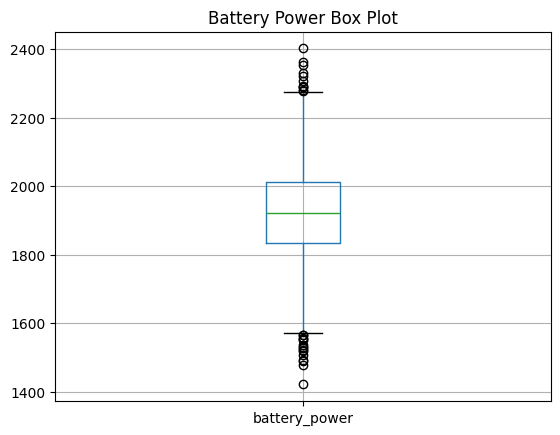

In [15]:
print("Outliers in battery_power:")
print("Banyak outliers: ", len(get_outliers(DATA, "battery_power")))
print("No      battery_power")
print(get_outliers(DATA, "battery_power")["battery_power"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['battery_power'])
plt.title('Battery Power Box Plot')

Outliers in clock_speed:
Banyak outliers:  15
No      clock_speed
145     1.981452
186     1.954328
214     0.269403
290     0.256667
394     0.285339
506     1.917131
936     1.974235
1156    0.063078
1351    0.086511
1372    0.287064
1571    2.145640
1638    2.056815
1808    0.188163
1858    0.202770
1912    0.178785
Name: clock_speed, dtype: float64


Text(0.5, 1.0, 'Clock Speed Box Plot')

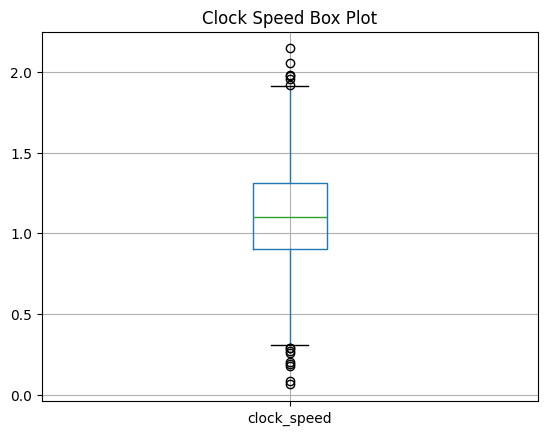

In [16]:
print("Outliers in clock_speed:")
print("Banyak outliers: ", len(get_outliers(DATA, "clock_speed")))
print("No      clock_speed")
print(get_outliers(DATA, "clock_speed")["clock_speed"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['clock_speed'])
plt.title('Clock Speed Box Plot')

Outliers in ram:
Banyak outliers:  13
No      ram
27       0.473096
441     11.730657
474     11.656129
494     12.147370
864      0.434078
889      0.547202
1039    -2.140214
1109     0.592505
1227    12.096538
1478    12.037179
1618    12.036310
1842     0.071127
1962    12.139339
Name: ram, dtype: float64


Text(0.5, 1.0, 'Ram Box Plot')

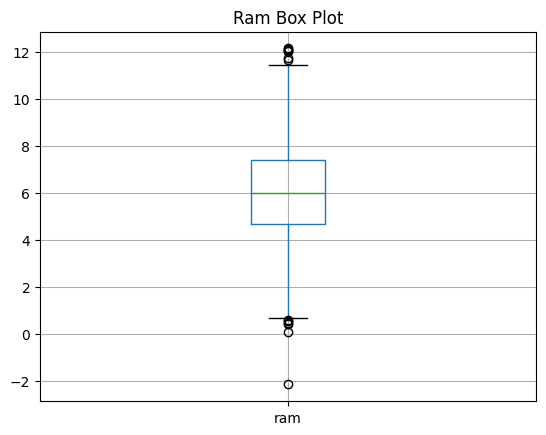

In [17]:
print("Outliers in ram:")
print("Banyak outliers: ", len(get_outliers(DATA, "ram")))
print("No      ram")
print(get_outliers(DATA, "ram")["ram"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['ram'])
plt.title('Ram Box Plot')

Outliers in n_cores:
Banyak outliers:  16
No      n_cores
80      18.273326
441     22.191140
542     18.774827
678     18.452401
683      5.740562
712      5.705081
870      5.763836
987      5.640941
1081     5.634702
1154    18.017614
1162    19.697229
1177     6.070553
1452     5.913436
1489     5.748217
1671    18.105431
1939     6.073804
Name: n_cores, dtype: float64


Text(0.5, 1.0, 'N Cores Box Plot')

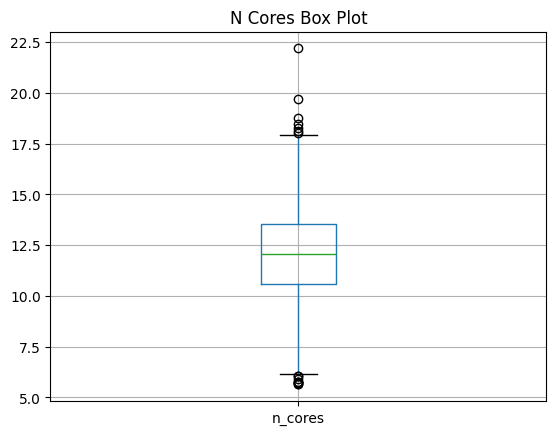

In [18]:
print("Outliers in n_cores:")
print("Banyak outliers: ", len(get_outliers(DATA, "n_cores")))
print("No      n_cores")
print(get_outliers(DATA, "n_cores")["n_cores"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['n_cores'])
plt.title('N Cores Box Plot')

Outliers in use_time:
Banyak outliers:  15
No      use_time
157     11.356261
213     11.649750
264     11.539920
315      4.752867
362     11.380132
598     11.765387
609     11.542616
644     11.512800
905      4.675472
1013     4.257735
1527    11.856342
1595     4.827739
1662     4.160599
1848     4.670485
1990     3.994350
Name: use_time, dtype: float64


Text(0.5, 1.0, 'Use Time Box Plot')

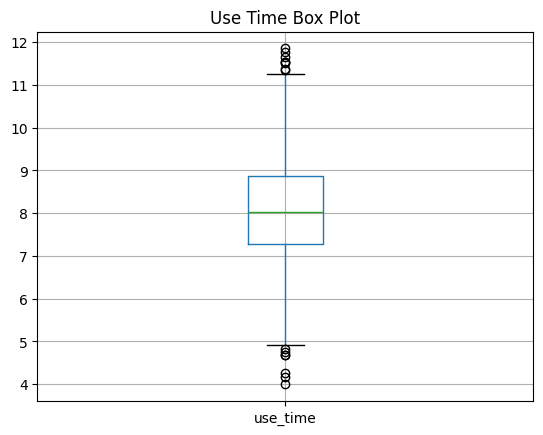

In [19]:
print("Outliers in use_time:")
print("Banyak outliers: ", len(get_outliers(DATA, "use_time")))
print("No      use_time")
print(get_outliers(DATA, "use_time")["use_time"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['use_time'])
plt.title('Use Time Box Plot')

Outliers in px_width:
Banyak outliers:  17
No      px_width
7       730.667041
18      730.908714
163     730.854386
371     730.643937
692     730.729805
769     730.690502
883     730.855474
1307    730.734553
1371    730.941198
1416    731.401917
1659    730.743109
1697    730.764742
1737    726.673319
1777    730.930922
1803    730.687817
1898    730.710150
1917    730.605495
Name: px_width, dtype: float64


Text(0.5, 1.0, 'Pixel Width Box Plot')

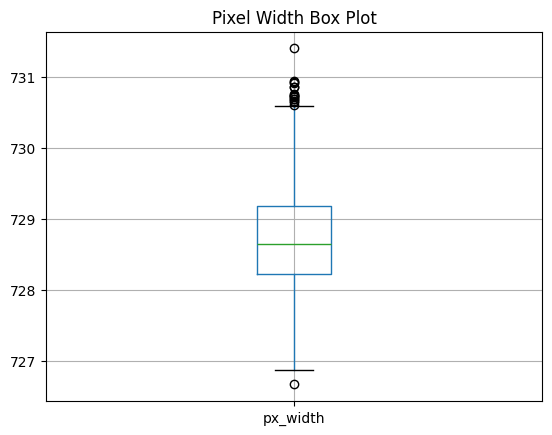

In [20]:
print("Outliers in px_width:")
print("Banyak outliers: ", len(get_outliers(DATA, "px_width")))
print("No      px_width")
print(get_outliers(DATA, "px_width")["px_width"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['px_width'])
plt.title('Pixel Width Box Plot')

Outliers in px_height:
Banyak outliers:  22
No      px_height
156     1033.108854
211     1037.509932
297     1033.227900
451     1033.410816
603     1033.172831
614     1033.345814
686     1033.112964
743     1033.280701
814     1033.426948
846     1032.823317
949     1033.391438
1069    1032.940610
1179    1033.013906
1247    1033.257944
1340    1033.274441
1348    1033.345416
1523    1033.242544
1608    1033.351177
1619    1033.424564
1645    1033.001635
1812    1033.179313
1992    1032.981014
Name: px_height, dtype: float64


Text(0.5, 1.0, 'Pixel height Box Plot')

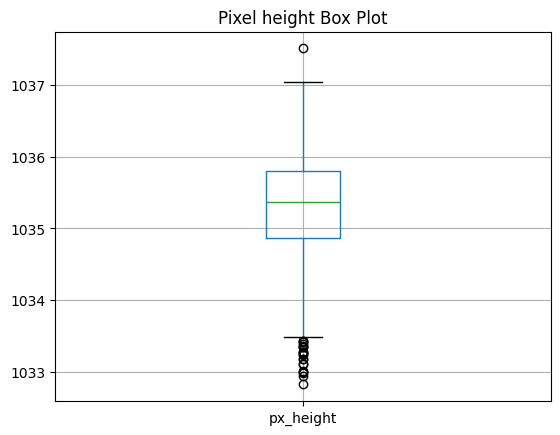

In [21]:
print("Outliers in px_height:")
print("Banyak outliers: ", len(get_outliers(DATA, "px_height")))
print("No      px_height")
print(get_outliers(DATA, "px_height")["px_height"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['px_height'])
plt.title('Pixel height Box Plot')

Outliers in 5g:
Banyak outliers:  1
No     5g
169    2.0
Name: 5g, dtype: float64


Text(0.5, 1.0, '5G Box Plot')

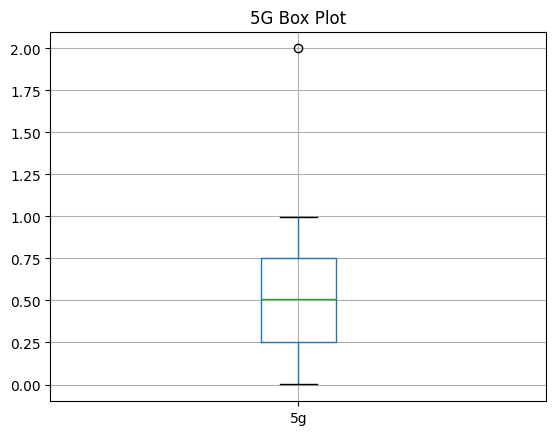

In [22]:
print("Outliers in 5g:")
print("Banyak outliers: ", len(get_outliers(DATA, "5g")))
print("No     5g")
print(get_outliers(DATA, "5g")["5g"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['5g'])
plt.title('5G Box Plot')

Outliers in price:
Banyak outliers:  19
No      price
84       1833.187135
92       2683.629253
328     15163.811877
474         0.000000
586      2232.054642
683        -1.000000
723     15293.505980
808     14223.308780
860      2769.668542
930     13742.721074
970      2708.118069
1218    13697.522574
1227        0.000000
1291    13302.208061
1512     2765.946663
1645     1420.694047
1712    13634.560163
1800     2378.141389
1933    13170.143430
Name: price, dtype: float64


Text(0.5, 1.0, 'Price Box Plot')

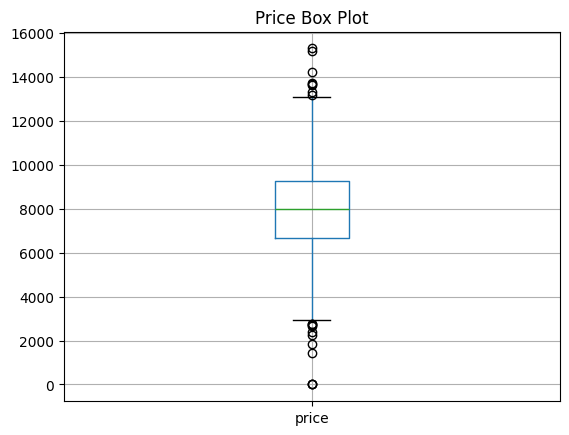

In [23]:
print("Outliers in price:")
print("Banyak outliers: ", len(get_outliers(DATA, "price")))
print("No      price")
print(get_outliers(DATA, "price")["price"])

# Visualisasi boxplot
plt.figure()
DATA.boxplot(column=['price'])
plt.title('Price Box Plot')

## 2.2 Jika ya, dapatkah anda menanganinya? 
Ya, outlier dapat ditangani. <br>Salah satu bentuk penanganan outlier adalah dengan metode imputasi nilai, yaitu dengan mengubah nilai outlier menjadi nilai yang lebih masuk akal, seperti mean, median, atau modus.

Dalam persoalan kali ini, nilai outliers akan diubah menjadi median dari data tempat outlier tersebut berada. Tujuannya adalah agar tidak ada data yang hilang sehingga tidak mempengaruhi pengolahan data selanjutnya. <br>Selain itu, median dipilih karena nilai median tidak terlalu dipengaruhi oleh outlier, sehingga penggantian nilai outlier menjadi median tidak akan mempengaruhi median dari himpunan data tempat outlier tersebut berada.

In [24]:
def changeOutliers(data, atribut):
    # Mengganti outliers dengan nilai median
    Q1 = myQ1(data, atribut)
    Q3 = myQ3(data, atribut)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data.loc[(data[atribut] < lower_bound) | (data[atribut] > upper_bound), atribut] = data[atribut].median()
    return data

def deleteOutliers(data, atribut):
    # Menghapus outliers
    Q1 = myQ1(data, atribut)
    Q3 = myQ3(data, atribut)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[atribut] >= lower_bound) & (data[atribut] <= upper_bound)]
    return data

In [25]:
# Mengganti outliers dengan nilai median
DATA = changeOutliers(DATA, "battery_power")
DATA = changeOutliers(DATA, "clock_speed")
DATA = changeOutliers(DATA, "ram")
DATA = changeOutliers(DATA, "n_cores")
DATA = changeOutliers(DATA, "use_time")
DATA = changeOutliers(DATA, "px_width")
DATA = changeOutliers(DATA, "px_height")
DATA = changeOutliers(DATA, "5g")
DATA = changeOutliers(DATA, "price")

## 2.3 Jelaskan apa yang umumnya dilakukan untuk menangani outlier!

Ada beberapa metode yang umum digunakan untuk mengatasi outlier:

1. Penghapusan: Salah satu metode untuk mengatasi outlier yang paling sederhana adalah dengan menghapus outlier tersebut dari himpunan data. Namun, pendekatan ini harus digunakan dengan hati-hati, karena penghapusan outlier dapat menyebabkan kehilangan informasi yang berharga dan memengaruhi validitas analisis.

2. Transformasi Data: Transformasi data, seperti logaritma atau akar kuadrat, dapat digunakan untuk mengurangi dampak outlier dan membuat distribusi data lebih simetris. Transformasi Logaritmik digunakan jika data memiliki distribusi yang skewed (condong). Transformasi logaritmik dapat mengurangi efek outliers. Transformasi akar kuadrat digunakan untuk meredam outliers dengan cara yang mirip dengan transformasi logaritmik tetapi dengan pendekatan berbeda.

3. Winsorizing: Mengubah nilai outliers ke nilai yang lebih dekat dengan data lainnya. Misalnya, jika outliers teridentifikasi, mereka dapat diubah menjadi nilai yang sesuai dengan persentil tertentu (misalnya, 5% atau 95%).

4. Imputasi Nilai: Imputasi nilai melibatkan penggantian nilai outlier dengan nilai yang dianggap lebih representatif dari himpunan data, misalnya nilai rata-rata atau median.

5. Penggunaan Model Statistik yang Tahan Terhadap Outlier: Beberapa model statistik, seperti regresi robust atau regresi quantil, dirancang untuk menangani outlier dengan lebih baik daripada model konvensional.

6. Pengelompokan Data: Mengelompokkan data ke dalam kelompok-kelompok homogen dapat membantu dalam mengurangi dampak outlier. Metode clustering seperti k-means clustering atau hierarchical clustering dapat digunakan untuk tujuan ini.

7. Penanganan Khusus Berdasarkan Domain: Dalam beberapa kasus, penanganan outliers dapat disesuaikan dengan pengetahuan domain atau konteks spesifik. Misalnya, dalam data keuangan, outliers mungkin mencerminkan kejadian langka tetapi penting dan harus dipertimbangkan dalam analisis.

# No. 3 
# Membuat Visualisasi plot distribusi. 
Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

- Jika numerik dapat dibuat dalam bentuk histogram dan box plot.
- Jika string dengan histogram. 

## 3.1 DATA NUMERIK

1. Battery Power

Text(0.5, 1.0, 'Battery Power Box Plot')

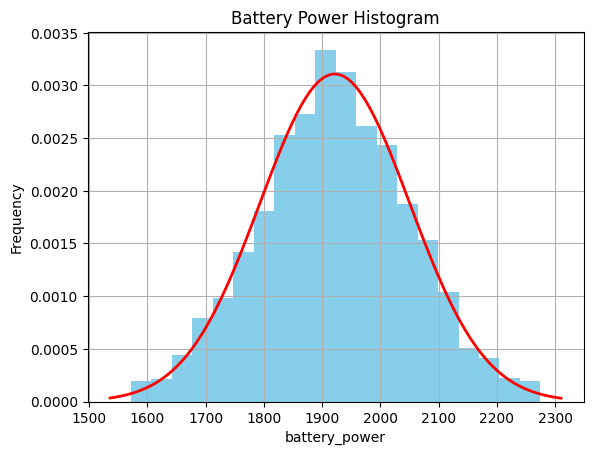

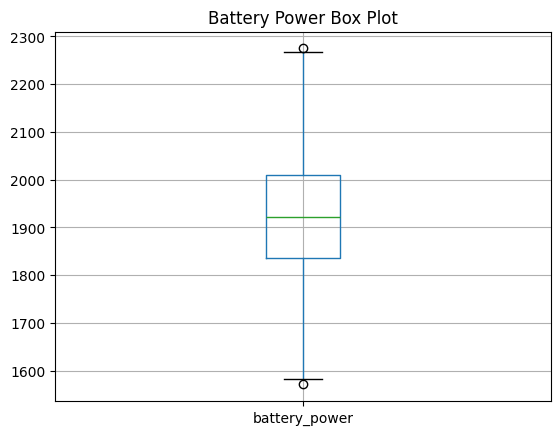

In [26]:
# HISTOGRAM
DATA['battery_power'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('battery_power')
plt.ylabel('Frequency')
plt.title('Battery Power Histogram')

# DISTRIBUSI
mu, std = norm.fit(DATA['battery_power'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['battery_power'])
plt.title('Battery Power Box Plot')

Histogram dari kolom battery_power menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi normal, yang artinya nilai rata-rata, median, dan modus sampel hampir sama.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 1600 sampai 2200).

2. Clock Speed

Text(0.5, 1.0, 'Clock Speed Box Plot')

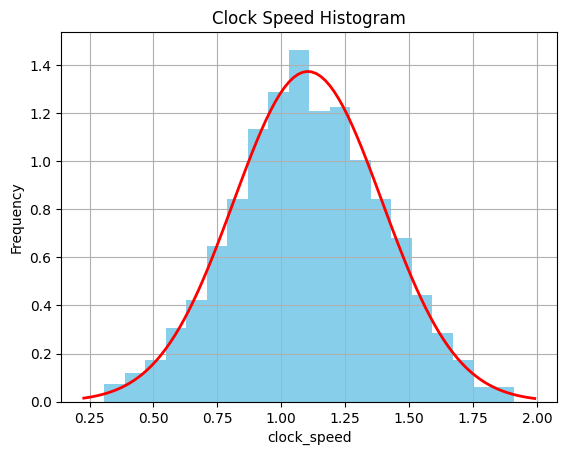

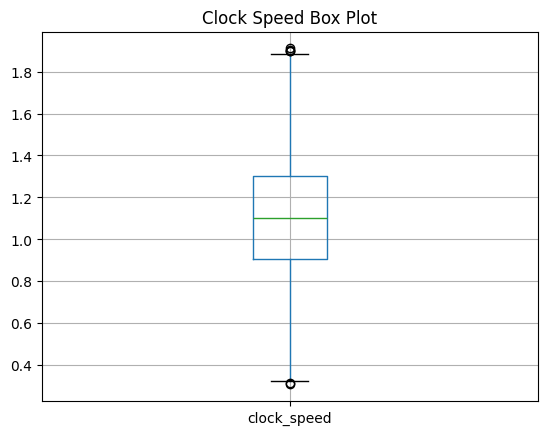

In [27]:
# HISTOGRAM
DATA['clock_speed'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('clock_speed')
plt.ylabel('Frequency')
plt.title('Clock Speed Histogram')

# DISTRIBUSI
mu, std = norm.fit(DATA['clock_speed'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['clock_speed'])
plt.title('Clock Speed Box Plot')

Histogram dari kolom clock_speed menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi normal, yang artinya nilai rata-rata, median, dan modus sampel hampir sama.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 0.3 sampai 1.9).

3. RAM

Text(0.5, 1.0, 'Ram Box Plot')

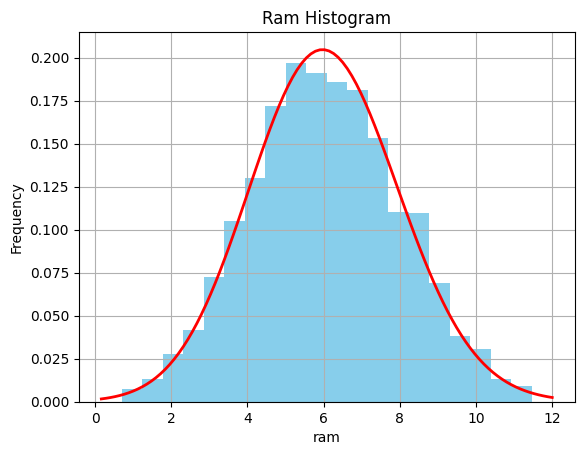

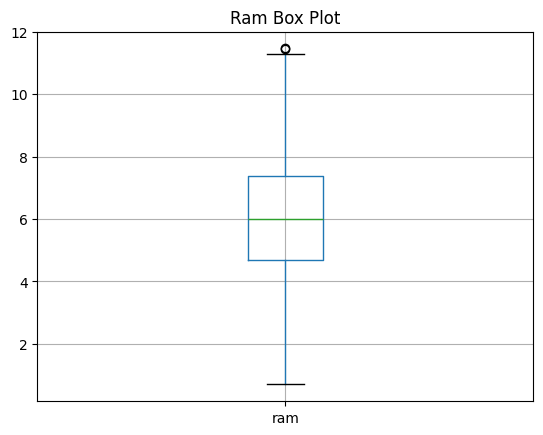

In [28]:
# HISTOGRAM
DATA['ram'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('ram')
plt.ylabel('Frequency')
plt.title('Ram Histogram')

# DISTRIBUSI
shape, loc, scale = gamma.fit(DATA["ram"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Gamma Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['ram'])
plt.title('Ram Box Plot')

Histogram dari kolom clock_speed menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi gamma dengan kemiringan/skewness yang hampir mendekati nol, sehingga bentuk distribusinya cukup mendekati distibusi normal.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 1 sampai 12).

4. N Cores

Text(0.5, 1.0, 'Core Box Plot')

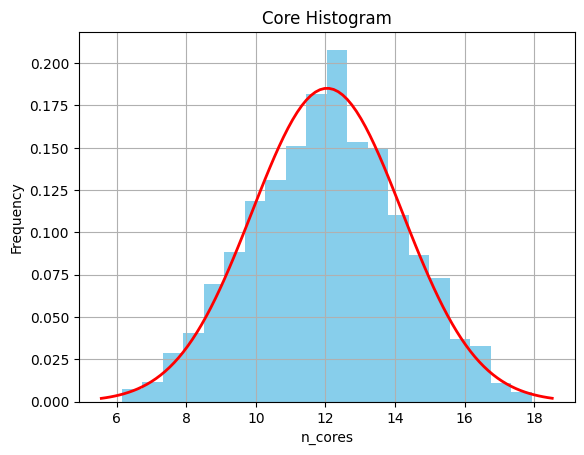

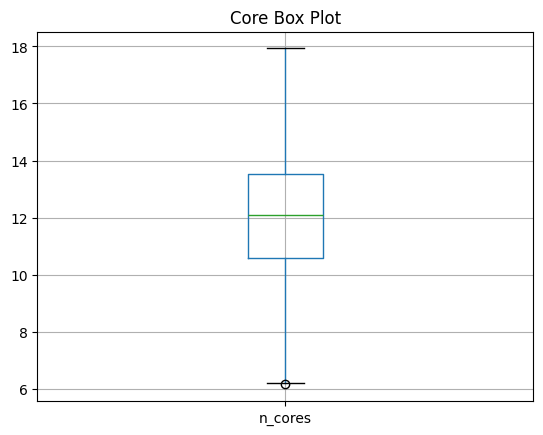

In [29]:
# HISTOGRAM
DATA['n_cores'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('n_cores')
plt.ylabel('Frequency')
plt.title('Core Histogram')

# DISTRIBUSI
mu, std = norm.fit(DATA['n_cores'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['n_cores'])
plt.title('Core Box Plot')

Histogram dari kolom n_cores menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi normal, yang artinya nilai rata-rata, median, dan modus sampel hampir sama.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 6 sampai 18).

5. Use Time

Text(0.5, 1.0, 'Use Time Box Plot')

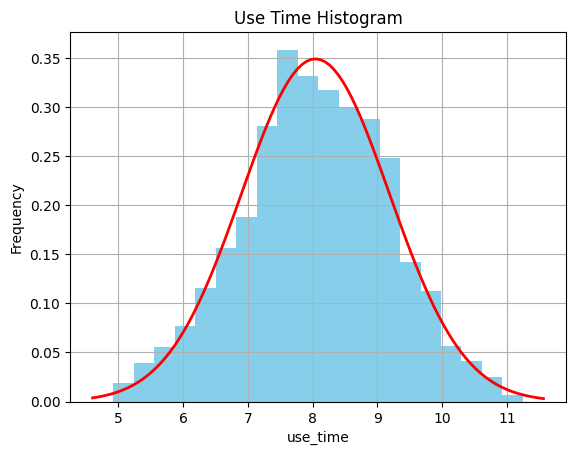

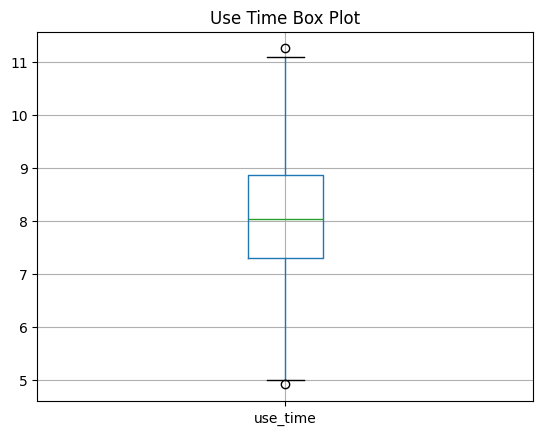

In [30]:
# HISTOGRAM
DATA['use_time'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('use_time')
plt.ylabel('Frequency')
plt.title('Use Time Histogram')

# DISTRIBUSI
mu, std = norm.fit(DATA['use_time'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['use_time'])
plt.title('Use Time Box Plot')

Histogram dari kolom use_time menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi normal, yang artinya nilai rata-rata, median, dan modus sampel hampir sama.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 5 sampai 11).

6. Pixel Width

Text(0.5, 1.0, 'Pixel Width Box Plot')

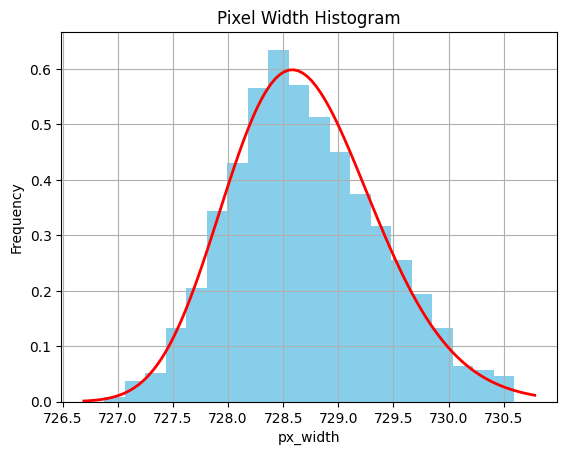

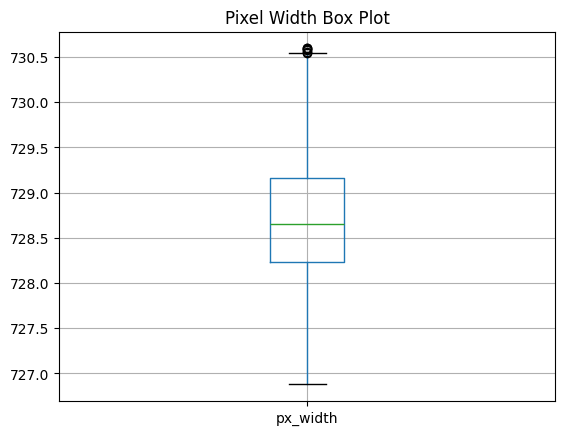

In [31]:
# HISTOGRAM
DATA['px_width'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('px_width')
plt.ylabel('Frequency')
plt.title('Pixel Width Histogram')

# DISTRIBUSI
shape, loc, scale = gamma.fit(DATA['px_width'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Gamma Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['px_width'])
plt.title('Pixel Width Box Plot')

Histogram dari kolom px_width menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi gamma dengan kemiringan/skewness positif.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 727 sampai 730).

7. Pixel Height

Text(0.5, 1.0, 'Pixel Height Box Plot')

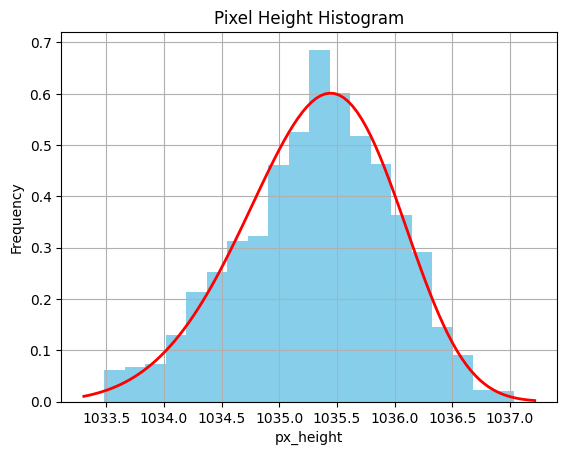

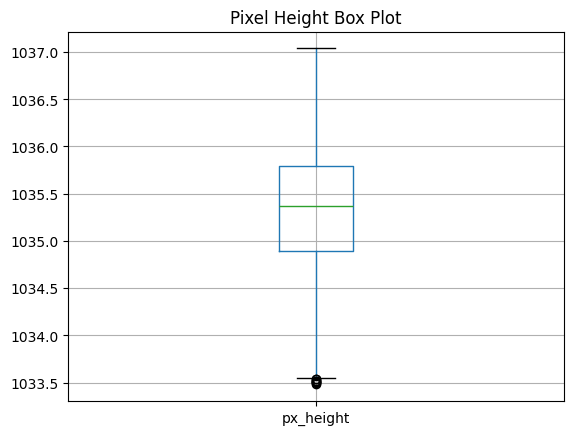

In [32]:
# HISTOGRAM
DATA['px_height'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('px_height')
plt.ylabel('Frequency')
plt.title('Pixel Height Histogram')

# DISTRIBUSI
shape, loc, scale = weibull_min.fit(DATA['px_height'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Weibull Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['px_height'])
plt.title('Pixel Height Box Plot')

Histogram dari kolom px_height menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi weibull dengan kemiringan/skewness negatif.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 1033 sampai 1037).

8. 5G

Text(0.5, 1.0, '5G Box Plot')

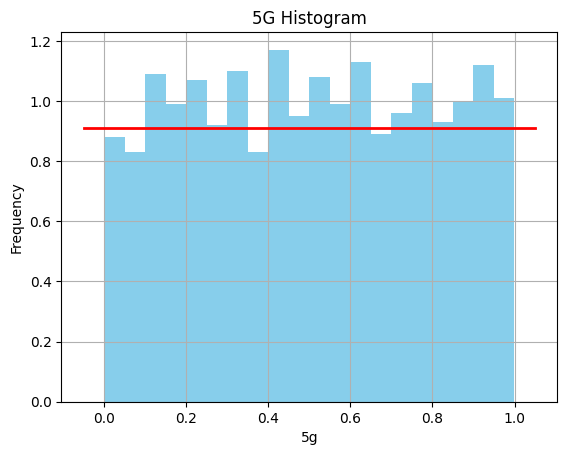

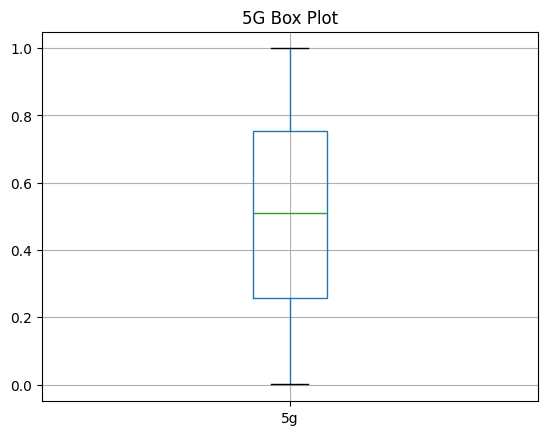

In [33]:
# HISTOGRAM
DATA['5g'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('5g')
plt.ylabel('Frequency')
plt.title('5G Histogram')

# DISTRIBUSI
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = uniform.pdf(x, xmin, xmax - xmin)
plt.plot(x, pdf, 'r-', linewidth=2, label='Uniform Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['5g'])
plt.title('5G Box Plot')

Histogram dari kolom 5g menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi uniform.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif sempit (dari sekitar 0 sampai 1).

9. Price

Text(0.5, 1.0, 'Price Box Plot')

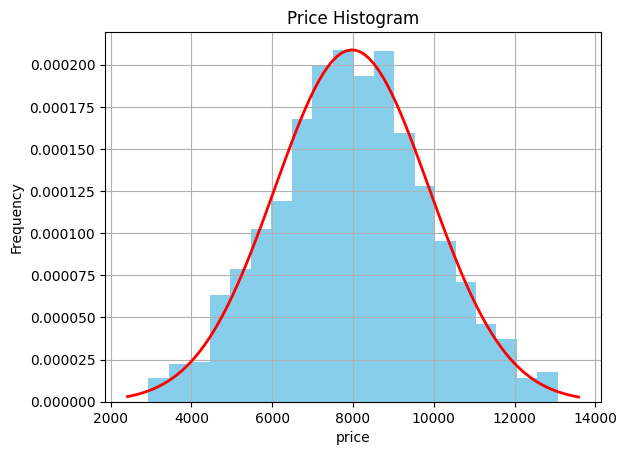

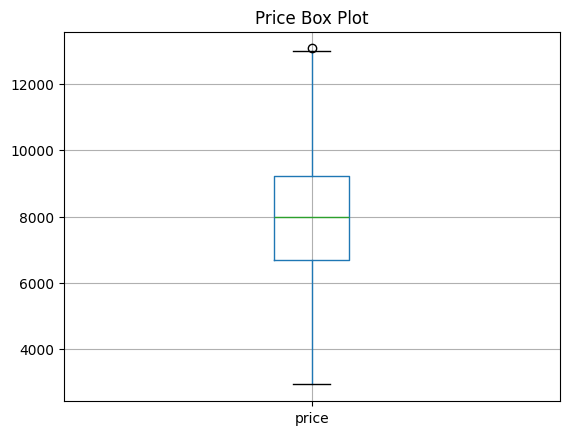

In [34]:
# HISTOGRAM
DATA['price'].hist(bins=20, density=True, histtype='bar', align='mid', color='skyblue')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Price Histogram')

# DISTRIBUSI
mu, std = norm.fit(DATA['price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

# BOXPLOT
plt.figure()
DATA.boxplot(column=['price'])
plt.title('Price Box Plot')

Histogram dari kolom price menunjukkan bahwa data sampel cenderung terdistribusi dalam distribusi normal, yang artinya nilai rata-rata, median, dan modus sampel hampir sama.
<br>Selain itu, pada Box Plot diperoleh beberapa outlier yang baru setelah pembersihan data pada proses sebelumnya dengan rentang interkuartil (IQR) yang relatif lebar (dari sekitar 3000 sampai 13000).

## 3.2 DATA NON-NUMERIK

1. Brand

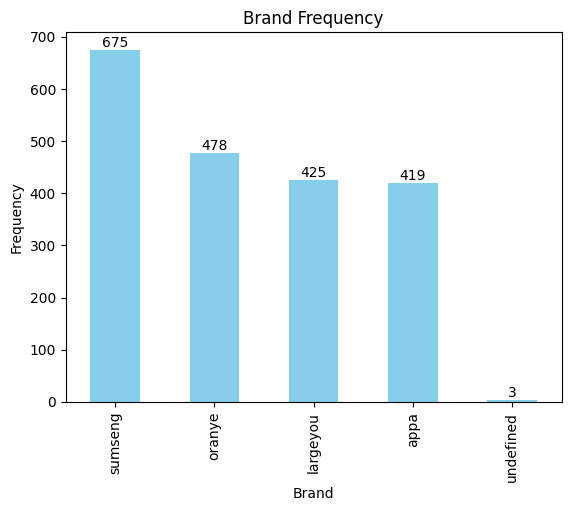

In [35]:
# Hitung frekuensi kemunculan
value_counts = DATA['brand'].value_counts()

# Plot diagram batang
value_counts.plot(kind="bar", color='skyblue')

# Tambahkan label pada sumbu-x dan sumbu-y serta judul diagram
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Brand Frequency')

# Tampilkan jumlah tiap bar
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Histogram kolom brand menunjukkan distribusi frekuensi untuk setiap brand dalam dataset.
<br>Brand yang paling banyak adalah sumseng serta terdapat 3 sampel dengan brand <i>undefined</i>.

2. Grade

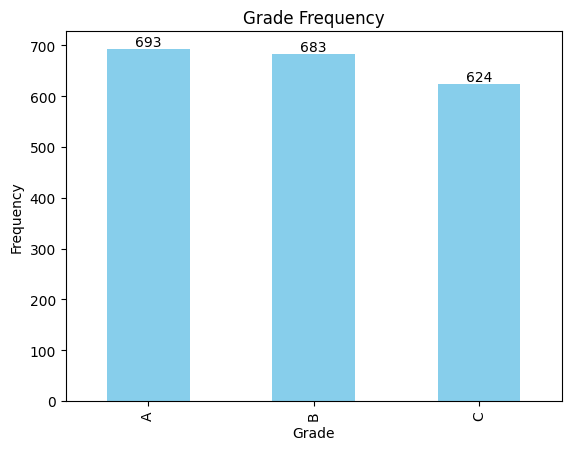

In [36]:
# Hitung frekuensi kemunculan
value_counts = DATA['grade'].value_counts()

# Plot diagram batang
value_counts.plot(kind="bar", color='skyblue')

# Tambahkan label pada sumbu-x dan sumbu-y serta judul diagram
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade Frequency')

# Tampilkan jumlah tiap bar
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Histogram kolom grade menunjukkan distribusi frekuensi untuk setiap grade/nilai dari <i>smartphone</i> dalam dataset.
<br>Distribusi grade hampir tersebar secara merata dengan modus ialah grade A.

# No. 4 
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. 
- Apakah kolom tersebut berdistribusi normal? 
- Jika bukan, terdistribusi seperti apa kolom tersebut?

# battery_power
Distribusi kolom battery_power mirip seperti distribusi normal, tetapi bersifat leptokurtic.  
Distribusi ini mempunyai mean, median, dan modus yang mirip, skewness mendekati 0, serta kurtosis bernilai positif.

# clock_speed
Distribusi kolom clock_speed hampir sama dengan distribusi normal.
Distribusi ini mempunyai mean, median, dan modus yang mirip, skewness mendekati 0, serta kurtosis mendekati 0.

# ram
Distribusi kolom ram mendekati distribusi gamma dengan skewness yang hampir nol sehingga cukup dekat dengan distribusi normal.
Distribusi ini mempunyai mean, median, dan modus yang mirip, skewness mendekati 0, serta kurtosis mendekati 0.

# n_cores
Distribusi kolom n_cores hampir sama dengan distribusi normal.  
Distribusi ini mempunyai mean, median, dan modus yang mirip, skewness mendekati 0, serta kurtosis mendekati 0.

# use_time
Distribusi kolom use_time hampir sama dengan distribusi normal.  
Distribusi ini mempunyai mean, median, dan modus yang mirip, skewness mendekati 0, serta kurtosis mendekati 0.

# px_width
Distribusi kolom px_width tidak terdistribusi secara normal, tetapi terdistribusi dalam distribusi gamma dengan skewness positif.
Distribusi ini mempunyai skewness bernilai positif serta kurtosis mendekati 0.

# px_height
Distribusi kolom px_height tidak terdistribusi secara normal, tetapi terdistribusi dalam distribusi weibull dengan skewness negatif dan bersifat leptocurtic.
Distribusi ini mempunyai skewness bernilai negatif serta kurtosis bernilai positif.

# 5g
Distribusi kolom 5g sangat jauh dari distribusi normal dan lebih mendekati distribusi uniform.  
Jika dilihat berdasarkan frekuensi, data tersebut cenderung tersebar cukup merata, mulai dari nilai 5g yang kecil sampai nilai 5g yang besar.

# price
Distribusi kolom price mirip seperti distribusi normal, tetapi bersifat leptokurtic.  
Distribusi ini mempunyai mean, median, dan modus yang mirip, skewness mendekati 0, serta kurtosis bernilai positif.

<i> Markuis Graylee adalah seorang metuber yang membuat konten mengenai produk-produk elektronik. Untuk salah satu ide kontennya, ia ingin mereview smartphone yang telah dirilis oleh beberapa perusahaan. Sebagai pendukung penelitian kontennya, ia memiliki akses pada sebuah dataset yang berisi informasi-informasi relevan yang dapat diteliti untuk menilai produk-produk yang dirilis perusahaan. Markuis juga ingin menemukan pola-pola atau hubungan yang dimiliki oleh produk-produk tersebut agar ia dapat mengetahui tren yang ada pada dunia per-smartphone-an.

Atribut: 
- battery_power
- clock_speed
- ram
- n_cores
- use_time
- px_width
- px_height
- brand
- 5g
- grade
- price 
</i>

<b>Gunakan alpha = 0.05</b>

# No. 5 Hipotesis 1 Sampel

In [37]:
def count_p_value(t, df, tailed):
    # menghitung p-value
    if tailed == 2: # two-tailed
        return 2 * stats.t.sf(abs(t), df)
    elif tailed == 1: # one-tailed right
        return stats.t.sf(t, df)
    else:
        return stats.t.sf(-t, df)

def count_t(x_bar, mu, s, n):
    # menghitung t
    return (x_bar - mu) / (s / math.sqrt(n))

def count_p_value_with_z(z, tailed):
    # menghitung p-value
    if tailed == 2: # two-tailed
        return 2 * stats.norm.sf(abs(z))
    elif tailed == 1: # one-tailed right
        return stats.norm.sf(z)
    else:
        return stats.norm.sf(-z)

def count_z_in_proportion_test(p, p0, n):
    # menghitung z
    return (p - p0) / math.sqrt((p0 * (1 - p0)) / n)

## 5.1 Testimoni dari pengguna banyak yang menyatakan bahwa kapasitas baterai yang digunakan kurang dari sewajarnya. Periksa apakah battery_power memiliki rata-rata di atas 1800?

Untuk memeriksa apakah rata-rata kapasitas baterai (battery_power) di atas 1800, akan digunakan uji hipotesis untuk rata-rata populasi. <br>Dalam kasus ini, akan digunakan uji t satu sampel karena kita tidak mengetahui standar deviasi dari populasi.

Langkah-langkah:
1. Hipotesis Nol :
      $$H_0 : μ = 1800$$
2. Hipotesis Alternatif :
      $$H_1 : μ > 1800$$
      $μ = 1800$ akan mewakili testimoni pelanggan ($μ ≤ 1800$)
      
3. Tingkat signifikansi : 
      $$α = 0.05$$

4. Tes statistik :
   <br>Akan digunakan uji t. Statistik uji t untuk rata-rata populasi adalah:
      $$ t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}} $$
      dengan derajat kebebasan
      $$v = n - 1$$
      dimana:
      - $x_{bar}$      : rata-rata sampel
      - $μ0$        : rata-rata yang diuji
      - $s$         : standar deviasi sampel
      - $n$         : ukuran sampel

    Adapun daerah kritis untuk uji hipotesis satu arah kanan dengan 
    $$α = 0.05 $$
    $$v = 1999$$
    $$v → ∞$$ 
    adalah:

    $$t_{kritis} > t_{0.05}$$
    <br>dari tabel distribusi t, diperoleh
    $$t_{kritis} > 1.645$$

5. Hitung $P_{Value}$ dari $X$
   - Pertama hitung nilai $t_{score}$ untuk $X_{bar}$ dengan rumus sebelumnya
   - Cari nilai $P_{Value}$ untuk $P(t > t_{score})$
      $$P_{Value} = P(t > t_{score})$$

In [38]:
miu_0 = 1800
alpha = 0.05
n = len(DATA)

# perhitungan rata-rata dan standar deviasi
my_x_bar = myMean(DATA, "battery_power")
my_s = myStdDev(DATA, "battery_power")

library_x_bar = DATA["battery_power"].mean()
library_s = DATA["battery_power"].std()

# ciritcal value
critical_value = stats.t.ppf(1 - alpha, len(DATA) - 1)  # dikurang 1 karena ppf menghitung kumulatif dari kiri, bukan kanan
                                                        # sedangkan uji yang dilakukan adalah uji one-tailed right

# perhitungan t
my_t = (count_t(my_x_bar, miu_0, my_s, len(DATA)))
library_t = (stats.ttest_1samp(DATA["battery_power"], miu_0))

# perhitungan p-value
my_p_value = count_p_value(my_t, n, 1)
library_p_value = library_t.pvalue

print("    My x_bar: ", my_x_bar.round(5))
print("    Library x_bar: ", library_x_bar.round(5))
print()
print("    My s: ", my_s.round(5))
print("    Library s: ", library_s.round(5))
print()
print("    Critical value: t >", critical_value.round(5))
print()
print("    My t: ", my_t.round(5))
print("    Library t: ", library_t.statistic.round(5))
print()
print("    My P-value: ", my_p_value.round(5))
print("    Library P-value: ", library_p_value.round(5))
print()
print("    My P-value < α:", my_p_value < alpha)
print("    Library P-value < α:", library_p_value < alpha)

    My x_bar:  1921.70977
    Library x_bar:  1921.70977

    My s:  128.37519
    Library s:  128.37519

    Critical value: t > 1.64562

    My t:  42.39936
    Library t:  42.39936

    My P-value:  0.0
    Library P-value:  0.0

    My P-value < α: True
    Library P-value < α: True


6. Diperoleh $P_{value}$ untuk kedua perhitungan (fungsi buatan sendiri dan library) = 0.
    <br> Karena $P_{value} < α (P_{value} < 0.05$), kita memiliki bukti yang cukup untuk <b>menolak hipotesis nol</b>.
    <br> Disimpulkan bahwa terdapat bukti yang signifikan bahwa rata-rata kapasitas baterai $(μ)$ lebih besar dari 1800.

## 5.2 Standar RAM yang dimiliki oleh suatu smartphone sekarang adalah 8 GB. Periksalah apakah rata-rata ram smartphone pada dataset adalah 8 GB?

Untuk memeriksa apakah rata-rata RAM (ram) adalah 8 GB, akan digunakan uji hipotesis untuk rata-rata populasi. <br>Dalam kasus ini, akan digunakan uji t satu sampel karena kita tidak mengetahui standar deviasi dari populasi.

Langkah-langkah:
1. Hipotesis Nol :
      $$H_0 : μ = 8$$
2. Hipotesis Alternatif :                 
      $$H_1 : μ ≠ 8$$
      
3. Tingkat signifikansi : 
      $$α = 0.05$$

4. Tes statistik :
   <br>Akan digunakan uji t. Statistik uji t untuk rata-rata populasi adalah:
      $$ t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}} $$
      dengan derajat kebebasan
      $$v = n - 1$$
      dimana:
      - $x_{bar}$      : rata-rata sampel
      - $μ0$        : rata-rata yang diuji
      - $s$         : standar deviasi sampel
      - $n$         : ukuran sampel

    Adapun daerah kritis untuk uji hipotesis dua arah dengan 
    $$α = 0.05 $$
    $$v = 1999$$
    $$v → ∞$$ 
    adalah:

    $$t_{kritis} < t_{-0.025} ∪ t_{kritis} > t_{0.025}$$
    <br>dari tabel distribusi t, diperoleh
    $$t_{kritis} < -1.960 ∪ t_{kritis} > 1.960$$

5. Hitung $P_{Value}$ dari $X$
   - Pertama hitung nilai $t_{score}$ untuk $X_{bar}$ dengan rumus sebelumnya
   - Cari nilai $P_{Value}$ untuk $P(t > t_{score})$
      $$P_{Value} = 2P(t > t_{score})$$

In [39]:
miu_0 = 8
alpha = 0.05
n = len(DATA)

# perhitungan rata-rata dan standar deviasi
my_x_bar = myMean(DATA, "ram")
my_s = myStdDev(DATA, "ram")

library_x_bar = DATA["ram"].mean()
library_s = DATA["ram"].std()

# ciritcal value uji 2 arah
# ciritcal value
critical_value_kanan = stats.t.ppf(1 - alpha / 2, n - 1)  # dikurang 1 karena ppf menghitung kumulatif dari kiri, bukan kanan
                                                          # sedangkan uji yang dilakukan adalah uji one-tailed right
critical_value_kiri = stats.t.ppf(alpha / 2, n - 1)

# perhitungan t
my_t = (count_t(my_x_bar, miu_0, my_s, len(DATA)))
library_t = (stats.ttest_1samp(DATA["ram"], miu_0))

# perhitungan p-value
my_p_value = count_p_value(my_t, n, 2)
library_p_value = library_t.pvalue

print("    My x_bar: ", my_x_bar.round(5))
print("    Library x_bar: ", library_x_bar.round(5))
print()
print("    My s: ", my_s.round(5))
print("    Library s: ", library_s.round(5))
print()
print("    Critical value: t <", critical_value_kiri.round(5))
print("    Critical_value: t >", critical_value_kanan.round(5))
print()
print("    My t: ", my_t.round(5))
print("    Library t: ", library_t.statistic.round(5))
print()
print("    My P-value: ", my_p_value.round(5))
print("    Library P-value: ", library_p_value.round(5))
print()
print("    My P-value < α:", my_p_value < alpha)
print("    Library P-value < α:", library_p_value < alpha)

    My x_bar:  6.04919
    Library x_bar:  6.04919

    My s:  1.95072
    Library s:  1.95072

    Critical value: t < -1.96115
    Critical_value: t > 1.96115

    My t:  -44.72332
    Library t:  -44.72332

    My P-value:  0.0
    Library P-value:  0.0

    My P-value < α: True
    Library P-value < α: True


6. Diperoleh $P_{value}$ untuk kedua perhitungan (fungsi buatan sendiri dan library) = 0.
    <br> Karena $P_{value} < α (P_{value} < 0.05$), kita memiliki bukti yang cukup untuk <b>menolak hipotesis nol</b>.
    <br> Disimpulkan bahwa rata-rata RAM dari smartphone yang terdapat di dalam dataset berbeda secara signifikan dari 8 GB $(μ ≠ 8)$

## 5.3 Periksa apakah 250 data pertama pada dataset memiliki rata-rata kecepatan clocking (clock_speed) tidak sama dengan 1!

Pertama, ambil terlebih dahulu 250 data pertama di dataset.

In [40]:
# Pertama, ambil terlebih dahulu 250 data pertama di dataset.
tempData = DATA.head(250)


Untuk memeriksa apakah rata-rata kecepatan clocking (clock_speed) tidak sama dengan 1, dapat dilakukan uji hipotesis dua arah. <br>Dalam kasus ini, akan digunakan uji t satu sampel karena kita tidak mengetahui standar deviasi dari populasi.

Langkah-langkah:
1. Hipotesis Nol :
      $$H_0 : μ = 1$$    
2. Hipotesis Alternatif :             
      $$H_1 : μ ≠ 1$$
      
3. Tingkat signifikansi : 
      $$α = 0.05$$

4. Tes statistik :
   <br>Akan digunakan uji t. Statistik uji t untuk rata-rata populasi adalah:
      $$ t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}} $$
      dengan derajat kebebasan
      $$v = n - 1$$
      dimana:
      - $x_{bar}$      : rata-rata sampel
      - $μ0$        : rata-rata yang diuji
      - $s$         : standar deviasi sampel
      - $n$         : ukuran sampel

    Adapun daerah kritis untuk uji hipotesis dua arah dengan 
    $$α = 0.05 $$
    $$v = 250$$
    $$v → ∞$$ 
    adalah:

    $$t_{kritis} < t_{-0.025} ∪ t_{kritis} > t_{0.025}$$
    <br>dari tabel distribusi t, diperoleh
    $$t_{kritis} < -1.960 ∪ t_{kritis} > 1.960$$

5. Hitung $P_{Value}$ dari $X$
   - Pertama hitung nilai $t_{score}$ untuk $X_{bar}$ dengan rumus sebelumnya
   - Cari nilai $P_{Value}$ untuk $P(t > t_{score})$
      $$P_{Value} = 2P(t > t_{score})$$

In [41]:
miu_0 = 1
alpha = 0.05
n = len(tempData)

# perhitungan rata-rata dan standar deviasi
my_x_bar = myMean(tempData, "clock_speed")
my_s = myStdDev(tempData, "clock_speed")

library_x_bar = tempData["clock_speed"].mean()
library_s = tempData["clock_speed"].std()

# ciritcal value
critical_value_kanan = stats.t.ppf(1 - alpha / 2, n - 1)  # dikurang 1 karena ppf menghitung kumulatif dari kiri, bukan kanan
                                                          # sedangkan uji yang dilakukan adalah uji one-tailed right
critical_value_kiri = stats.t.ppf(alpha / 2, n - 1)
# perhitungan t
my_t = (count_t(my_x_bar, miu_0, my_s, n))
library_t = (stats.ttest_1samp(tempData["clock_speed"], miu_0))

# perhitungan p-value
my_p_value = count_p_value(my_t, n, 2)
library_p_value = library_t.pvalue

print("    My x_bar: ", my_x_bar.round(5))
print("    Library x_bar: ", library_x_bar.round(5))
print()
print("    My s: ", my_s.round(5))
print("    Library s: ", library_s.round(5))
print()
print("    Critical value: t <", critical_value_kiri.round(5))
print("    Critical value: t >", critical_value_kanan.round(5))
print()
print("    My t: ", my_t.round(5))
print("    Library t: ", library_t.statistic.round(5))
print()
print("    My P-value: ", my_p_value.round(5))
print("    Library P-value: ", library_p_value.round(5))
print()
print("    My P-value < α:", my_p_value < alpha)
print("    Library P-value < α:", library_p_value < alpha)

    My x_bar:  1.08615
    Library x_bar:  1.08615

    My s:  0.31577
    Library s:  0.31577

    Critical value: t < -1.96954
    Critical value: t > 1.96954

    My t:  4.31396
    Library t:  4.31396

    My P-value:  2e-05
    Library P-value:  2e-05

    My P-value < α: True
    Library P-value < α: True


6. Diperoleh P_value untuk kedua perhitungan (fungsi buatan sendiri dan library) < α.
    <br> Karena $P_{value} < α$ ($P_{value} < 0.05$), kita memiliki bukti yang cukup untuk <b>menolak hipotesis nol</b>. 
    <br> Oleh karena itu, kita menyimpulkan bahwa rata-rata kecepatan clocking (clock_speed) dari 250 data pertama pada dataset secara signifikan berbeda dari 1.

## 5.4 Periksalah apakah data smartphone dengan merek “appa” yang memiliki rata-rata waktu penggunaan (use_time) lebih dari 8.5 tidak sama dengan 35% dari data keseluruhan?

Pertama, ambil terlebih dahulu sample yang memenuhi permintaan persoalan.

In [42]:
tempData = DATA[DATA["brand"] == "appa"]
tempData = tempData[tempData["use_time"] > 8.5]

Untuk memeriksa apakah rata-rata data smartphone dengan merek “appa” yang memiliki rata-rata waktu penggunaan (use_time) lebih dari 8.5 tidak sama dengan 35% dari data keseluruhan dapat dilakukan uji hipotesis proporsi dua arah.

Langkah-langkah:
1. Hipotesis Nol :
      $$H_0 : p = 0.35$$
2. Hipotesis Alternatif :
      $$H_1 : p ≠ 0.35$$
      
3. Tingkat signifikansi : 
      $$α = 0.05$$

4. Tes statistik :
   <br>Akan digunakan uji z (distribusi binomial didekati dengan distribusi normal)
      $$ z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0q_0}{n}}}$$
      dimana:
      - $p_{hat}$     : proporsi sample yang ingin di uji
      - $p_0$       : proporsi yang dihipotesiskan
      - $q_0$        : $1 - p_0$
      - $n$         : ukuran sampel keseluruhan

    Adapun daerah kritis untuk uji hipotesis dua arah dengan 
    $$α = 0.05 $$
    adalah:

    $$z_{kritis} < z_{-0.025} ∪ z_{kritis} > z_{0.975}$$
    <br>dari tabel distribusi normal, diperoleh
    $$z_{kritis} < -1.96 ∪ z_{kritis} > 1.96$$

5. Hitung $P_{Value}$ dari $X$
   - Pertama hitung nilai $z_{score}$
   - Cari nilai $P_{Value}$ untuk $P(z > z_{score})$
      $$P_{Value} = 2P(z > z_{score})$$

In [43]:
p0 = 0.35
q0 = 1 - p0
alpha = 0.05
n = len(DATA)
x = len(tempData[tempData["use_time"] > 8.5])

# critical value
critical_value_kiri = stats.norm.ppf(alpha / 2)
critical_value_kanan = stats.norm.ppf(1 - alpha / 2)

# perhitungan z_score
p_hat = x / n

my_z = count_z_in_proportion_test(p_hat, p0, n)
library_z = count_z_in_proportion_test(p_hat, p0, n)

# perhitungan p-value
my_p_value = count_p_value_with_z(my_z, 2)
library_p_value = 2*stats.norm.sf(abs(library_z))

print("    p0: ", p0)
print("    n: ", n)
print("    x: ", x)
print("    p_{hat}: ", p_hat)
print()
print("    My z: ", round(my_z,5))
print("    Library z: ", round(library_z,5))
print()
print("    Critical value: z <", critical_value_kiri.round(5))
print("    Critical value: z >", critical_value_kanan.round(5))
print()
print("    My P-value: ", my_p_value)
print("    Library P-value: ", library_p_value)
print()
print("    My P-value < α:", my_p_value < alpha)
print("    Library P-value < α:", library_p_value < alpha)

    p0:  0.35
    n:  2000
    x:  139
    p_{hat}:  0.0695

    My z:  -26.30009
    Library z:  -26.30009

    Critical value: z < -1.95996
    Critical value: z > 1.95996

    My P-value:  1.9133914631139802e-152
    Library P-value:  1.9133914631139802e-152

    My P-value < α: True
    Library P-value < α: True


6. Diperoleh $P_{value}$ untuk kedua perhitungan (fungsi buatan sendiri dan library) $< α$.
    <br> Karena $P_{value} < α$ ($P_{value} < 0.05$), kita memiliki bukti yang cukup untuk <b>menolak hipotesis nol</b>. 
    <br> Oleh karena itu, kita menyimpulkan bahwa data smartphone dengan merek “appa” yang memiliki rata-rata waktu penggunaan (use_time) lebih dari 8.5 tidak sama dengan 35% dari data keseluruhan.

# No. 6 Hipotesis 2 Sampel

Markuis berasumsi setengah bagian pertama dataset adalah smartphone generasi sebelumnya dan setengah bagian terakhir adalah smartphone generasi sekarang.

In [44]:
# Mean
def myMean2(data, atribut):
    # mean = Σx / n
    n = data[atribut].shape[0]
    jumlah = 0
    for i in range(n):
        jumlah += data[atribut][i]
    return jumlah/n

# Variance
def myVariance2(data, atribut):
    # variance = Σ(x - mean)^2 / (n - 1)
    n = data[atribut].shape[0]
    mean = myMean2(data, atribut)
    jumlah = 0
    for i in range(n):
        jumlah += (data[atribut][i] - mean) ** 2
    return jumlah / (n - 1)

In [45]:
# Pisah data smartphone generasi sebelumnya dan generasi sekarang
n: int = DATA.shape[0]
old_smartphone: pd.DataFrame = DATA.loc[:(n / 2 - 1)]
new_smartphone: pd.DataFrame = DATA.loc[(n / 2):]
new_smartphone.reset_index(drop=True, inplace=True)

## 6.1 Periksa apakah rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang?

Sebelum melakukan tes hipotesis pada rata-rata, kita perlu mengecek apakah variansi populasi dari kedua generasi sama atau tidak karena tidak diketahui informasi mengenai variansi populasi.

Langkah-langkah:  
1. Hipotesis nol:  
   $$H_0 : σ^2_1 = σ^2_2$$  
   $σ^2_1$: variansi populasi dari jumlah core smartphone generasi sekarang  
   $σ^2_2$: variansi populasi dari jumlah core smartphone generasi sebelumnya  

2. Hipotesis alternatif:  
   $$H_1 : σ^2_1 ≠ σ^2_2$$  

3. Tingkat signifikan:
   $$α = 0.05$$  

In [46]:
# Tingkat signifikan
alpha = 0.05

4. Uji statistik:  
   Pada kasus ini, digunakan uji hipotesis variansi pada 2 sampel.  
   Statistik nilai-f untuk variansi 2 sampel:  
   $$f = \frac{s^2_1}{s^2_2}$$  
   $s^2_1$: variansi sampel dari jumlah core smartphone generasi sekarang  
   $s^2_2$: variansi sampel dari jumlah core smartphone generasi sebelumnya  

   Daerah kritis:  
   $$f_{critical} < f_{1-α/2}(v_1, v_2) \: atau \: f_{critical} > f_{α/2}(v_1, v_2)$$
   untuk:
   $$α = 0.05$$  
   $$v_1 = n_1 - 1 = 1000 - 1 = 999$$  
   $$v_2 = n_2 - 1= 1000 - 1 = 999$$  
   $n_1$: banyak sampel dari jumlah core smartphone generasi sekarang  
   $n_2$: banyak sampel dari jumlah core smartphone generasi sebelumnya 

In [47]:
# batas daerah kritis
print("batas kiri:", stats.f.isf(1 - alpha / 2, 999, 999).round(3))
print("batas kanan:", stats.f.isf(alpha / 2, 999, 999).round(3))

batas kiri: 0.883
batas kanan: 1.132


Berdasarkan nilai batas yang diperoleh, diperoleh daerah kritis:  
$$f_{critical} < 0.883 \: atau \: f_{critical} > 1.132$$  

5. Nilai uji statistik dan p-value

In [48]:
# Variansi sampel
my_var_1 = myVariance2(new_smartphone, "n_cores")
my_var_2 = myVariance2(old_smartphone, "n_cores")
library_s1 = new_smartphone["n_cores"].var()
library_s2 = old_smartphone["n_cores"].var()

# nilai-f dan p-value
my_f = my_var_1 / my_var_2
my_p_value = 2 * min(stats.f.sf(my_f, 999, 999), 1 - stats.f.sf(my_f, 999, 999))
library_f = library_s1 / library_s2
library_p_value = 2 * min(stats.f.sf(library_f, 999, 999), 1 - stats.f.sf(library_f, 999, 999))
print("my_f:", my_f.round(3))
print("my_p_value:", my_p_value.round(3))
print("library_f:", library_f.round(3))
print("library_p_value:", library_p_value.round(3))

my_f: 0.984
my_p_value: 0.803
library_f: 0.984
library_p_value: 0.803


6. Berdasarkan perhitungan, diperoleh:  
   f = 0.984  
   p-value = 0.803
   
   f berada di luar critical region  
   p-value > α  
   Oleh karena itu, $H_0$ tidak ditolak. Variansi dari jumlah core smartphone (n_cores) sama pada kedua generasi.  

Karena kesamaan variansi sudah diketahui, kita dapat melakukan tes hipotesis untuk rata-rata

Langkah-langkah:  
1. Hipotesis nol:  
   $$H_0 : μ_1 = μ_2$$  
   $μ_1$: rata-rata populasi dari jumlah core smartphone generasi sekarang  
   $μ_2$: rata-rata populasi dari jumlah core smartphone generasi sebelumnya  

2. Hipotesis alternatif:  
   $$H_1 : μ_1 ≠ μ_2$$  

3. Tingkat signifikan:
   $$α = 0.05$$  

In [49]:
# Tingkat signifikan
alpha = 0.05

4. Uji statistik:  
   Pada kasus ini, digunakan uji hipotesis rata-rata pada 2 sampel.  
   Statistik nilai-t untuk variansi 2 sampel:  
   $$t = \frac{(\bar{x}_1 - \bar{x}_2) - d_0}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$  
   $$v = n_1 + n_2 - 2$$
   $$s_p = \sqrt{\frac{(n_1 - 1) s^2_1 + (n_2 - 1) s^2_2}{n_1 + n_2 - 2}}$$
   $s^2_1$: variansi sampel dari jumlah core smartphone generasi sekarang  
   $s^2_2$: variansi sampel dari jumlah core smartphone generasi sebelumnya  

   Daerah kritis:  
   $$t_{critical} < -t_{α/2} \: atau \: t_{critical} > t_{α/2}$$
   untuk:
   $$α = 0.05$$  

In [50]:
# batas daerah kritis
print("batas kiri:", -stats.t.isf(alpha / 2, 1998).round(3))
print("batas kanan:", stats.t.isf(alpha / 2, 1998).round(3))

batas kiri: -1.961
batas kanan: 1.961


Berdasarkan nilai batas yang diperoleh, diperoleh daerah kritis:  
$$t_{critical} < -1.961 \: atau \: t_{critical} > 1.961$$  

5. Nilai uji statistik dan p-value

In [51]:
# Rata-rata sampel
my_xbar1 = myMean2(new_smartphone, "n_cores")
my_xbar2 = myMean2(old_smartphone, "n_cores")
library_xbar1 = new_smartphone["n_cores"].mean()
library_xbar2 = old_smartphone["n_cores"].mean()

# Variansi sampel
my_var_1 = myVariance2(new_smartphone, "n_cores")
my_var_2 = myVariance2(old_smartphone, "n_cores")
library_s1 = new_smartphone["n_cores"].var()
library_s2 = old_smartphone["n_cores"].var()

# d0, n1, n2, v, sp
d0 = 0
n1 = new_smartphone["n_cores"].shape[0]
n2 = old_smartphone["n_cores"].shape[0]
v = n1 + n2 - 2
sp = np.sqrt(((n1 - 1) * my_var_1 + (n2 - 1) * my_var_2) / v)

# nilai-t dan p-value
my_t = (my_xbar1 - my_xbar2 - d0) / (sp * np.sqrt(1 / n1 + 1 / n2))
my_p_value = 2 * stats.t.sf(np.abs(my_t), v)
library_t, library_p_value = stats.ttest_ind(new_smartphone["n_cores"], old_smartphone["n_cores"], equal_var=True, alternative="two-sided")
print("my_t:", my_t.round(3))
print("my_p_value:", my_p_value.round(3))
print("library_t:", library_t.round(3))
print("library_p_value:", library_p_value.round(3))

my_t: -1.038
my_p_value: 0.299
library_t: -1.038
library_p_value: 0.299


6. Berdasarkan perhitungan, diperoleh:  
   t = -1.038  
   p-value = 0.299  
   
   t berada di luar critical region  
   p-value > α  
   Oleh karena itu, $H_0$ tidak ditolak. Rata-rata dari jumlah core (n_cores) sama pada kedua generasi.  

## 6.2 Bagaimana dengan harga smartphone, apakah harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya?

Sebelum melakukan tes hipotesis pada rata-rata, kita perlu mengecek apakah variansi populasi dari kedua generasi sama atau tidak karena tidak diketahui informasi mengenai variansi populasi.

Langkah-langkah:  
1. Hipotesis nol:  
   $$H_0 : σ^2_1 = σ^2_2$$  
   $σ^2_1$: variansi populasi dari harga smartphone generasi sekarang  
   $σ^2_2$: variansi populasi dari harga smartphone generasi sebelumnya  

2. Hipotesis alternatif:  
   $$H_1 : σ^2_1 ≠ σ^2_2$$  

3. Tingkat signifikan:
   $$α = 0.05$$  

In [52]:
# Tingkat signifikan
alpha = 0.05

4. Uji statistik:  
   Pada kasus ini, digunakan uji hipotesis variansi pada 2 sampel.  
   Statistik nilai-f untuk variansi 2 sampel:  
   $$f = \frac{s^2_1}{s^2_2}$$  
   $s^2_1$: variansi sampel dari harga smartphone generasi sekarang  
   $s^2_2$: variansi sampel dari harga smartphone generasi sebelumnya  

   Daerah kritis:  
   $$f_{critical} < f_{1-α/2}(v_1, v_2) \: atau \: f_{critical} > f_{α/2}(v_1, v_2)$$
   untuk:
   $$α = 0.05$$  
   $$v_1 = n_1 - 1 = 1000 - 1 = 999$$  
   $$v_2 = n_2 - 1= 1000 - 1 = 999$$  
   $n_1$: banyak sampel dari harga smartphone generasi sekarang  
   $n_2$: banyak sampel dari harga smartphone generasi sebelumnya 

In [53]:
# batas daerah kritis
print("batas kiri:", stats.f.isf(1 - alpha / 2, 999, 999).round(3))
print("batas kanan:", stats.f.isf(alpha / 2, 999, 999).round(3))

batas kiri: 0.883
batas kanan: 1.132


Berdasarkan nilai batas yang diperoleh, diperoleh daerah kritis:  
$$f_{critical} < 0.883 \: atau \: f_{critical} > 1.132$$  

5. Nilai uji statistik dan p-value

In [54]:
# Variansi sampel
my_var_1 = myVariance2(new_smartphone, "price")
my_var_2 = myVariance2(old_smartphone, "price")
library_s1 = new_smartphone["price"].var()
library_s2 = old_smartphone["price"].var()

# nilai-f dan p-value
my_f = my_var_1 / my_var_2
my_p_value = 2 * min(stats.f.sf(my_f, 999, 999), 1 - stats.f.sf(my_f, 999, 999))
library_f = library_s1 / library_s2
library_p_value = 2 * min(stats.f.sf(library_f, 999, 999), 1 - stats.f.sf(library_f, 999, 999))
print("my_f:", my_f.round(3))
print("my_p_value:", my_p_value.round(3))
print("library_f:", library_f.round(3))
print("library_p_value:", library_p_value.round(3))

my_f: 1.018
my_p_value: 0.775
library_f: 1.018
library_p_value: 0.775


6. Berdasarkan perhitungan, diperoleh:  
   f = 1.018  
   p-value = 0.775
   
   f berada di luar critical region  
   p-value > α  
   Oleh karena itu, $H_0$ tidak ditolak. Variansi dari jumlah core smartphone (n_cores) sama pada kedua generasi.  

Karena kesamaan variansi sudah diketahui, kita dapat melakukan tes hipotesis untuk rata-rata

Langkah-langkah:  
1. Hipotesis nol:  
   $$H_0 : μ_1 - μ_2 = 100$$  
   $μ_1$: rata-rata populasi dari harga smartphone generasi sekarang  
   $μ_2$: rata-rata populasi dari harga smartphone generasi sebelumnya  

2. Hipotesis alternatif:  
   $$H_1 : μ_1 - μ_2 ≠ 100$$  

3. Tingkat signifikan:
   $$α = 0.05$$  

In [55]:
# Tingkat signifikan
alpha = 0.05

4. Uji statistik:  
   Pada kasus ini, digunakan uji hipotesis rata-rata pada 2 sampel.  
   Statistik nilai-t untuk variansi 2 sampel:  
   $$t = \frac{(\bar{x}_1 - \bar{x}_2) - d_0}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$  
   $$v = n_1 + n_2 - 2$$
   $$s_p = \sqrt{\frac{(n_1 - 1) s^2_1 + (n_2 - 1) s^2_2}{n_1 + n_2 - 2}}$$
   $s^2_1$: variansi sampel dari harga smartphone generasi sekarang  
   $s^2_2$: variansi sampel dari harga smartphone generasi sebelumnya  

   Daerah kritis:  
   $$t_{critical} < -t_{α/2} \: atau \: t_{critical} > t_{α/2}$$
   untuk:
   $$α = 0.05$$  

In [56]:
# batas daerah kritis
print("batas kiri:", -stats.t.isf(alpha / 2, 1998).round(3))
print("batas kanan:", stats.t.isf(alpha / 2, 1998).round(3))

batas kiri: -1.961
batas kanan: 1.961


Berdasarkan nilai batas yang diperoleh, diperoleh daerah kritis:  
$$t_{critical} < -1.961 \: atau \: t_{critical} > 1.961$$  

5. Nilai uji statistik dan p-value

In [57]:
# Rata-rata sampel
my_xbar1 = myMean2(new_smartphone, "price")
my_xbar2 = myMean2(old_smartphone, "price")
library_xbar1 = new_smartphone["price"].mean()
library_xbar2 = old_smartphone["price"].mean()
print("my_xbar1:", my_xbar1.round(3))
print("my_xbar2:", my_xbar2.round(3))
print("library_xbar1:", library_xbar1.round(3))
print("library_xbar2:", library_xbar2.round(3))

# Variansi sampel
my_var_1 = myVariance2(new_smartphone, "price")
my_var_2 = myVariance2(old_smartphone, "price")
library_s1 = new_smartphone["price"].var()
library_s2 = old_smartphone["price"].var()

# d0, n1, n2, v, sp
d0 = 100
n1 = new_smartphone["price"].shape[0]
n2 = old_smartphone["price"].shape[0]
v = n1 + n2 - 2
sp = np.sqrt(((n1 - 1) * my_var_1 + (n2 - 1) * my_var_2) / v)

# nilai-t dan p-value
my_t = (my_xbar1 - my_xbar2 - d0) / (sp * np.sqrt(1 / n1 + 1 / n2))
my_p_value = 2 * stats.t.sf(np.abs(my_t), v)
library_t, library_p_value = stats.ttest_ind(new_smartphone["price"] - d0, old_smartphone["price"], equal_var=True, alternative="two-sided")
print("my_t:", my_t.round(3))
print("my_p_value:", my_p_value.round(3))
print("library_t:", library_t.round(3))
print("library_p_value:", library_p_value.round(3))

my_xbar1: 7973.966
my_xbar2: 7976.19
library_xbar1: 7973.966
library_xbar2: 7976.19
my_t: -1.196
my_p_value: 0.232
library_t: -1.196
library_p_value: 0.232


6. Berdasarkan perhitungan, diperoleh:  
   t = -1.196  
   p-value = 0.232  
   
   t berada di luar critical region  
   p-value > α  
   Oleh karena itu, $H_0$ tidak ditolak. Rata-rata harga (price) smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya.  

## 6.3 Apakah variansi dari tinggi smartphone (px_height) sama pada kedua generasi?

Langkah-langkah:  
1. Hipotesis nol:  
   $$H_0 : σ^2_1 = σ^2_2$$  
   $σ^2_1$: variansi populasi dari tinggi smartphone generasi sekarang  
   $σ^2_2$: variansi populasi dari tinggi smartphone generasi sebelumnya  

2. Hipotesis alternatif:  
   $$H_1 : σ^2_1 ≠ σ^2_2$$  

3. Tingkat signifikan:
   $$α = 0.05$$  

In [58]:
# Tingkat signifikan
alpha = 0.05

4. Uji statistik:  
   Pada kasus ini, digunakan uji hipotesis variansi pada 2 sampel.  
   Statistik nilai-f untuk variansi 2 sampel:  
   $$f = \frac{s^2_1}{s^2_2}$$  
   $s^2_1$: variansi sampel dari tinggi smartphone generasi sekarang  
   $s^2_2$: variansi sampel dari tinggi smartphone generasi sebelumnya  

   Daerah kritis:  
   $$f_{critical} < f_{1-α/2}(v_1, v_2) \: atau \: f_{critical} > f_{α/2}(v_1, v_2)$$
   untuk:
   $$α = 0.05$$  
   $$v_1 = n_1 - 1 = 1000 - 1 = 999$$  
   $$v_2 = n_2 - 1= 1000 - 1 = 999$$  
   $n_1$: banyak sampel dari tinggi smartphone generasi sekarang  
   $n_2$: banyak sampel dari tinggi smartphone generasi sebelumnya 

In [59]:
# batas daerah kritis
print("batas kiri:", stats.f.isf(1 - alpha / 2, 999, 999).round(3))
print("batas kanan:", stats.f.isf(alpha / 2, 999, 999).round(3))

batas kiri: 0.883
batas kanan: 1.132


Berdasarkan nilai batas yang diperoleh, diperoleh daerah kritis:  
$$f_{critical} < 0.883 \: atau \: f_{critical} > 1.132$$  

5. Nilai uji statistik dan p-value

In [60]:
# Variansi sampel
my_var_1 = myVariance2(new_smartphone, "px_height")
my_var_2 = myVariance2(old_smartphone, "px_height")
library_s1 = new_smartphone["px_height"].var()
library_s2 = old_smartphone["px_height"].var()

# nilai-f dan p-value
my_f = my_var_1 / my_var_2
my_p_value = 2 * min(stats.f.sf(my_f, 999, 999), 1 - stats.f.sf(my_f, 999, 999))
library_f = library_s1 / library_s2
library_p_value = 2 * min(stats.f.sf(library_f, 999, 999), 1 - stats.f.sf(library_f, 999, 999))
print("my_f:", my_f.round(3))
print("my_p_value:", my_p_value.round(3))
print("library_f:", library_f.round(3))
print("library_p_value:", library_p_value.round(3))

my_f: 0.951
my_p_value: 0.428
library_f: 0.951
library_p_value: 0.428


6. Berdasarkan perhitungan, diperoleh:  
   f = 0.951  
   p-value = 0.428
   
   f berada di luar critical region  
   p-value > α  
   Oleh karena itu, $H_0$ tidak ditolak. Variansi dari tinggi smartphone (px_height) sama pada kedua generasi.  

## 6.4 Apakah proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang?

Langkah-langkah:  
1. Hipotesis nol:  
   $$H_0 : p_1 = p_2$$  
   $p_1$: proporsi populasi dari kapasitas baterai smartphone yang lebih dari 2030 pada smartphone generasi sekarang  
   $p_2$: proporsi populasi dari kapasitas baterai smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya  

2. Hipotesis alternatif:  
   $$H_1 : p_1 < p_2$$  

3. Tingkat signifikan:
   $$α = 0.05$$  

In [61]:
# Tingkat signifikan
alpha = 0.05

4. Uji statistik:  
   Pada kasus ini, digunakan uji hipotesis proporsi pada 2 sampel.  
   Statistik nilai-z untuk variansi 2 sampel:  
   $$z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p}\hat{q}(\frac{1}{n_1} + \frac{1}{n_2})}}$$  
   $$\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$$
   $$\hat{q} = 1 - \hat{p}$$
   $\hat{p_1}$: proporsi sampel dari kapasitas baterai smartphone yang lebih dari 2030 pada smartphone generasi sekarang  
   $\hat{p_2}$: proporsi sampel dari kapasitas baterai smartphone yang lebih dari 2030 pada smartphone generasi sekarang  
   $x_1$: banyak sampel dari kapasitas baterai smartphone yang lebih dari 2030 pada smartphone generasi sekarang  
   $x_2$: banyak sampel dari kapasitas baterai smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya  
   $n_1$: banyak sampel smartphone generasi sekarang  
   $n_2$: banyak sampel smartphone generasi sebelumnya  

   Daerah kritis:  
   $$z_{critical} < -z_α$$
   untuk:
   $$α = 0.05$$  

In [62]:
# batas daerah kritis
print("batas kiri:", -stats.norm.isf(alpha).round(3))

batas kiri: -1.645


Berdasarkan nilai batas yang diperoleh, diperoleh daerah kritis:  
$$z_{critical} < -1.645$$  

5. Nilai uji statistik dan P-value

In [63]:
# Ambil semua data battery_power
new_battery_power: pd.Series = new_smartphone["battery_power"]
old_battery_power: pd.Series = old_smartphone["battery_power"]

# Ambil data battery_power yang lebih dari 2030
new_battery_power_2030: pd.Series = new_battery_power[new_battery_power > 2030]
old_battery_power_2030: pd.Series = old_battery_power[old_battery_power > 2030]

# n1, n2, p1, p2, p, q
x1 = new_battery_power_2030.shape[0]
x2 = old_battery_power_2030.shape[0]
n1 = new_battery_power.shape[0]
n2 = old_battery_power.shape[0]
p1 = x1 / n1
p2 = x2 / n2
p = (x1 + x2) / (n1 + n2)
q = 1 - p

# nilai-z dan p-value
my_z = (p1 - p2) / np.sqrt(p * q * (1 / n1 + 1 / n2))
my_p_value = stats.norm.cdf(my_z)
library_z, library_p_value = proportions_ztest([x1, x2], [n1, n2], alternative="smaller")
print("my_z:", my_z.round(3))
print("my_p_value:", my_p_value.round(3))
print("library_z:", library_z.round(3))
print("library_p_value:", library_p_value.round(3))


my_z: 0.614
my_p_value: 0.731
library_z: 0.614
library_p_value: 0.731


6. Berdasarkan perhitungan, diperoleh:  
   z = 0.614  
   p-value = 0.731
   
   z berada di luar critical region  
   p-value > α  
   Oleh karena itu, $H_0$ tidak ditolak. Proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya sama dengan proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang.  